<a href="https://colab.research.google.com/github/EmersonFranca/IDH_Atlas/blob/master/Criando_Features%5CFeature_Coeficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import probplot

# 2. Versões das bibliotecas importadas

In [3]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.3
1.18.4
0.10.1


# 3. Importando meu arquivo python de Funções

In [4]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=29ca9d9669d4f8756f963686585012deb79e19d0c8f2073a681f713892cc0109
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
# Primeiro passo, salvar o arquivo Funcoes_para_Previsao no drive
# Segundo passo, clicar em Mount Drive
# Terceiro passo, mover o arquivo Funcoes_para_Previsao para o mesmo nível da pasta sample_data e drive

In [0]:
import import_ipynb

importing Jupyter notebook from Funcoes_para_Previsao.ipynb
1.0.3
1.18.4
0.10.1
Quantidade de registros para Teste:  1670
Quantidade de registros para Treino:  3895
[16:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
df_teste_retorno:  (1670, 9)
r2_score:  0.6615025330789903
raiz_do_erro_quadratico_medio:  114.70502325202254


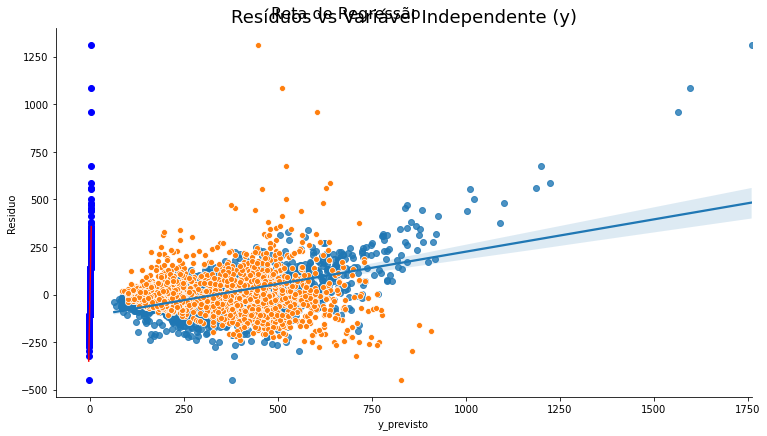

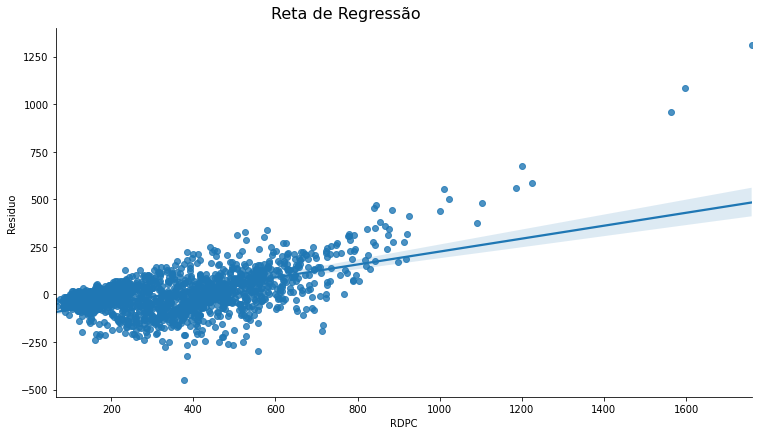

In [7]:
import Funcoes_para_Previsao

# 4. Importando os dados

In [0]:
URL_IDH_1991 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_1991.csv?raw=true"
URL_IDH_2000 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2000.csv?raw=true"
URL_IDH_2010 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2010.csv?raw=true"

In [0]:
dfIDH_2000 = pd.read_csv(URL_IDH_2000,sep=';')

# 5. Criando um df para eu testar features

In [0]:
colunas_analise = ['RDPC','T_AGUA','AGUA_ESGOTO','T_LIXO','T_LUZ','T_BANAGUA']

In [11]:
df = dfIDH_2000[colunas_analise]
df.head()

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA
0,371.15,57.13,27.52,70.33,70.14,42.56
1,530.87,73.54,21.14,90.61,93.43,67.08
2,342.46,58.61,27.36,76.57,80.31,46.33
3,456.63,78.60,14.28,90.22,90.58,67.20
4,511.47,73.98,24.82,70.04,91.79,61.93


In [0]:
df_features = df.copy(deep=True)

# 6 Gráficos que me motivaram a criar a feature

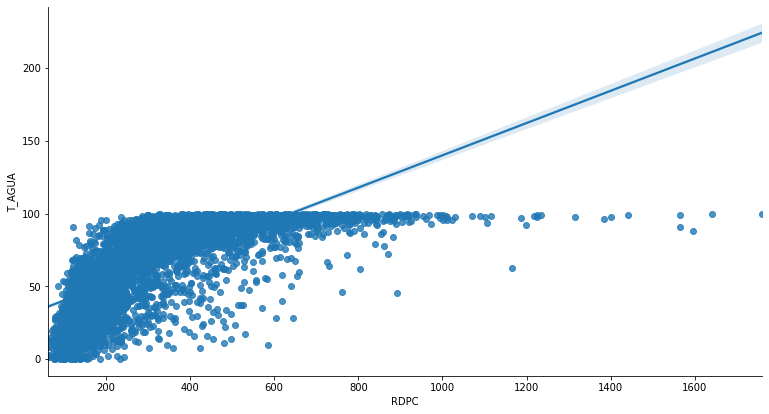

In [13]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='T_AGUA')
ax.fig.set_size_inches(12, 6)
ax

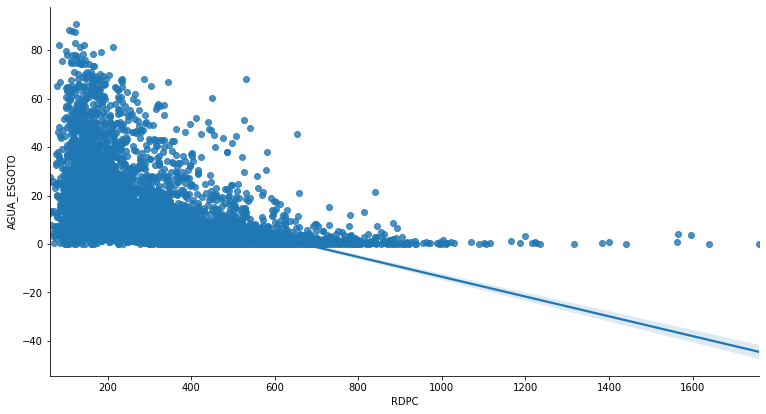

In [14]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='AGUA_ESGOTO')
ax.fig.set_size_inches(12, 6)
ax

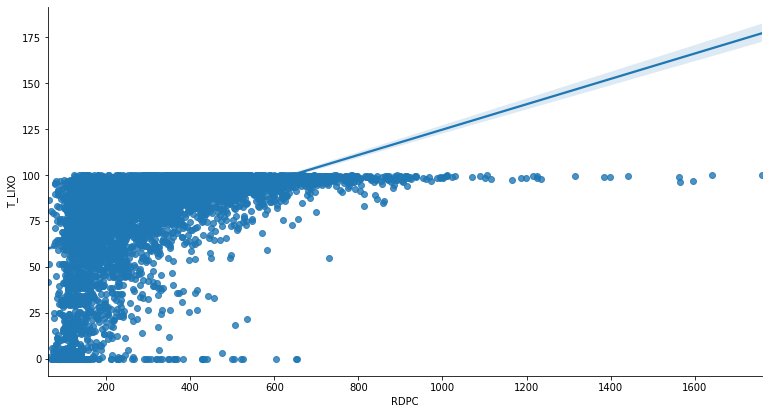

In [15]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='T_LIXO')
ax.fig.set_size_inches(12, 6)
ax

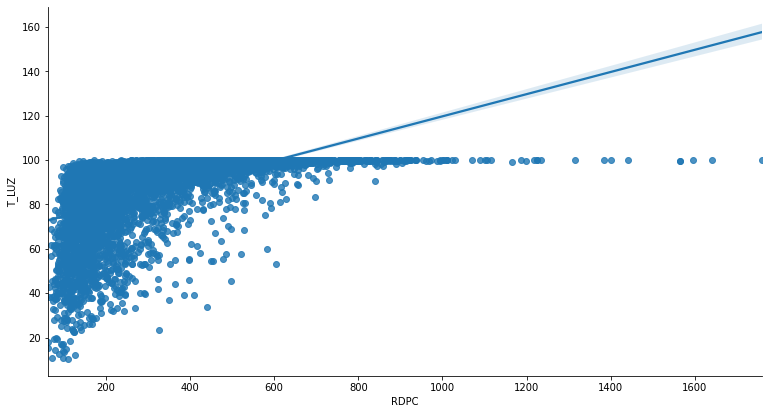

In [16]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='T_LUZ')
ax.fig.set_size_inches(12, 6)
ax

# 7.  Criando uma feature

## <font color = 'blue'> Suponho que a partir de um certo valor de RDPC, as variáveis T_AGUA, AGUA_ESGOTO, etc. não explicam tão bem o valor de RDPC. Para isso estou criando uma variável que mostrará entre 0 e 1, quanto falta pra chegar no RDPC = 800. Cidades com RDPC maior que 800, deixarei com a variável igual a 1

In [0]:
def feature_coeficiente_RDPC_limite (parametro_df, parametro_limite_RDPC):

  parametro_df['Coeficiente_RDPC'] = parametro_df.RDPC / parametro_limite_RDPC

  fun_condicao_maior_que_limite = (parametro_df['Coeficiente_RDPC'] > 1)

  parametro_df['Coeficiente_RDPC'] = parametro_df['Coeficiente_RDPC'].mask(fun_condicao_maior_que_limite,1)

  return parametro_df

In [0]:
df_testando_funcao = df.copy(deep=True)
df_testando_funcao = feature_coeficiente_RDPC_limite(df_testando_funcao,800)

In [0]:
df_features = feature_coeficiente_RDPC_limite(df_testando_funcao,800)

In [20]:
df_features.corr()

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,Coeficiente_RDPC
RDPC,1.000000,0.732029,-0.503222,0.518954,0.564849,0.770363,0.983151
T_AGUA,0.732029,1.000000,-0.699020,0.660121,0.757469,0.964102,0.760857
AGUA_ESGOTO,-0.503222,-0.699020,1.000000,-0.430353,-0.415422,-0.715620,-0.521008
T_LIXO,0.518954,0.660121,-0.430353,1.000000,0.580449,0.670667,0.538472
T_LUZ,0.564849,0.757469,-0.415422,0.580449,1.000000,0.766812,0.586969
T_BANAGUA,0.770363,0.964102,-0.715620,0.670667,0.766812,1.000000,0.799868
Coeficiente_RDPC,0.983151,0.760857,-0.521008,0.538472,0.586969,0.799868,1.000000


# <font color = 'red'>  7. Testando modelo com a feature criada </font>

In [0]:
dfTeste, dfTreino = Funcoes_para_Previsao.retorna_dfTeste_e_dfTreino(df_features, 0.3,123,'RDPC')

In [0]:
modelo = xgboost.XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=100,reg_alpha=0.80,seed=180) 

In [23]:
retorno_df_teste, r2_score, raiz_erro_quadratico_medio = Funcoes_para_Previsao.testa_modelo(modelo, dfTeste,dfTreino)  

[16:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
print ("R² Score: ", r2_score)
print ("Raiz Erro Quadrático Médio", raiz_erro_quadratico_medio)

R² Score:  0.9735490522712974
Raiz Erro Quadrático Médio 32.064564401335915


In [25]:
retorno_df_teste

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,Coeficiente_RDPC,y_previsto,Residuo,Residuo_Absoluto
2394,464.32,95.27,1.34,97.15,98.39,94.65,0.580400,463.233368,1.086632,1.086632
3965,229.43,74.04,17.22,67.23,82.93,49.79,0.286788,227.344849,2.085151,2.085151
3363,555.87,97.15,1.07,99.22,99.37,96.24,0.694837,555.116211,0.753789,0.753789
1533,122.38,27.25,15.74,70.73,80.22,15.32,0.152975,122.310333,0.069667,0.069667
2769,153.25,35.81,17.64,80.04,69.94,33.37,0.191562,155.640015,-2.390015,2.390015
...,...,...,...,...,...,...,...,...,...,...
1637,165.52,51.58,38.75,72.60,90.78,46.11,0.206900,165.771744,-0.251744,0.251744
3649,402.55,99.08,0.32,100.00,100.00,98.07,0.503188,404.888092,-2.338092,2.338092
1692,160.89,44.11,37.84,90.01,94.34,35.09,0.201112,162.086838,-1.196838,1.196838
2903,534.12,95.61,1.20,99.55,95.85,96.31,0.667650,533.663269,0.456731,0.456731


(0.9203512560830508,
 (0.9203512560830508, 0.9203512560830508, 0.9203512560830508))

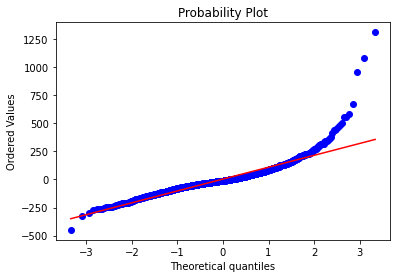

In [33]:
Funcoes_para_Previsao.plota_probplot_residuos(retorno_df_teste)

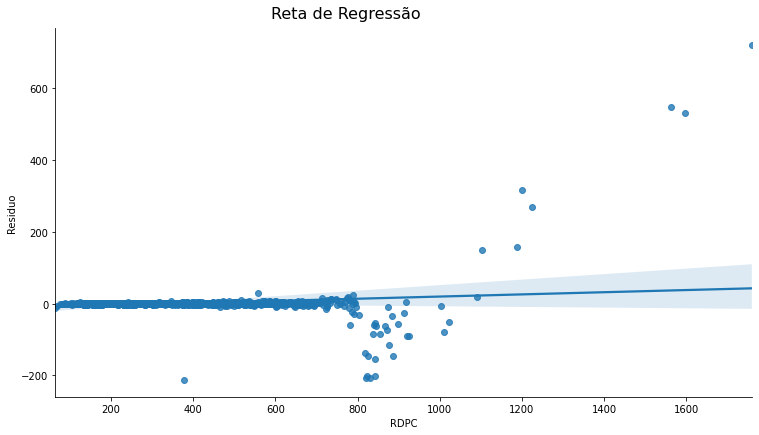

In [34]:
Funcoes_para_Previsao.plota_regressaolinear_RDPC_yprevisto(retorno_df_teste)

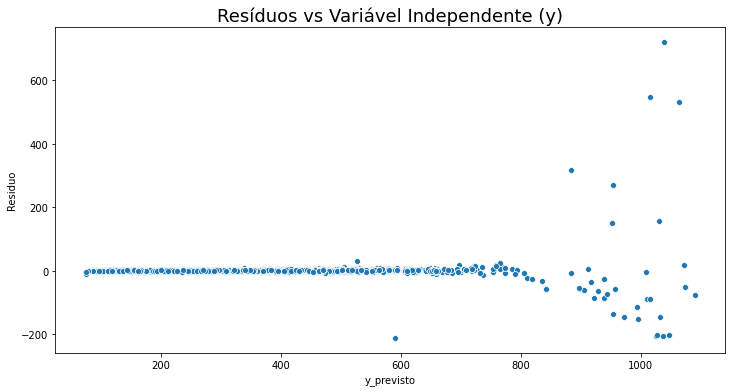

In [35]:
Funcoes_para_Previsao.plota_residuos_vs_yprevisto(retorno_df_teste)

In [38]:
retorno_df_teste.sort_values(by='Residuo_Absoluto',ascending=False).head(30)

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,Coeficiente_RDPC,y_previsto,Residuo,Residuo_Absoluto
3272,1759.76,100.00,0.00,100.00,100.00,100.00,1.000000,1037.814819,721.945181,721.945181
4336,1563.49,99.24,0.68,99.26,99.58,97.76,1.000000,1015.135193,548.354807,548.354807
3221,1596.51,87.83,3.72,96.90,99.96,89.31,1.000000,1063.803223,532.706777,532.706777
5564,1199.44,92.36,3.14,98.28,99.67,92.65,1.000000,883.636230,315.803770,315.803770
3374,1223.77,97.73,0.67,98.70,99.89,97.26,1.000000,953.739319,270.030681,270.030681
3673,377.51,99.35,0.00,97.57,100.00,97.42,0.471888,590.408875,-212.898875,212.898875
4619,819.69,98.00,0.71,99.64,99.92,97.63,1.000000,1026.064819,-206.374819,206.374819
3571,830.69,98.02,0.56,98.85,99.97,97.13,1.000000,1036.898682,-206.208682,206.208682
4688,823.36,93.39,3.96,99.25,99.72,90.42,1.000000,1026.394531,-203.034531,203.034531
3533,843.57,97.46,0.43,99.79,99.93,97.29,1.000000,1046.297119,-202.727119,202.727119


# <font color = 'red'>  8. Testando modelo com a feature criada em dados de 2010 </font>

In [0]:
dfIDH_2010 = pd.read_csv(URL_IDH_2010,sep=';')

In [27]:
df2010 = dfIDH_2010[colunas_analise]
df2010.head(2)

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA
0,476.99,93.69,9.31,94.05,93.98,80.20
1,689.95,98.54,11.40,96.72,98.58,85.35


In [28]:
df2010 = feature_coeficiente_RDPC_limite(df2010,800)
df2010.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,Coeficiente_RDPC
0,476.99,93.69,9.31,94.05,93.98,80.20,0.596237
1,689.95,98.54,11.40,96.72,98.58,85.35,0.862438


In [0]:
df2010_teste, df2010_treino = Funcoes_para_Previsao.retorna_dfTeste_e_dfTreino(df2010,0.3,123,'RDPC')

In [30]:
retorno_df2010_teste, r2_score_2010, raiz_erro_quadratico_medio_2010 = Funcoes_para_Previsao.testa_modelo(modelo, df2010_teste, df2010_treino)

[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
r2_score_2010

0.9324789194322953